# KJB quote distributions

So - which parts of KJB are most quoted in our novel corpus?

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from quotes.models import Match

First, step through all 5+-word matches and build up a big list that contains the indexes of all words that fall inside of quoted passages, however many times they appear. Eg, if 20 quoted passages include the 100th token in the bible, `100` would show up 20 times in the list.

In [3]:
quoted = []

for m in Match.query.filter(Match.size >= 5):
    quoted += range(m.a_start, m.a_start + m.size)

In [4]:
from quotes.text import RawText

kjb = RawText.from_file('../data/kjb.txt')

Plot this list of quoted token indexes as a histogram:

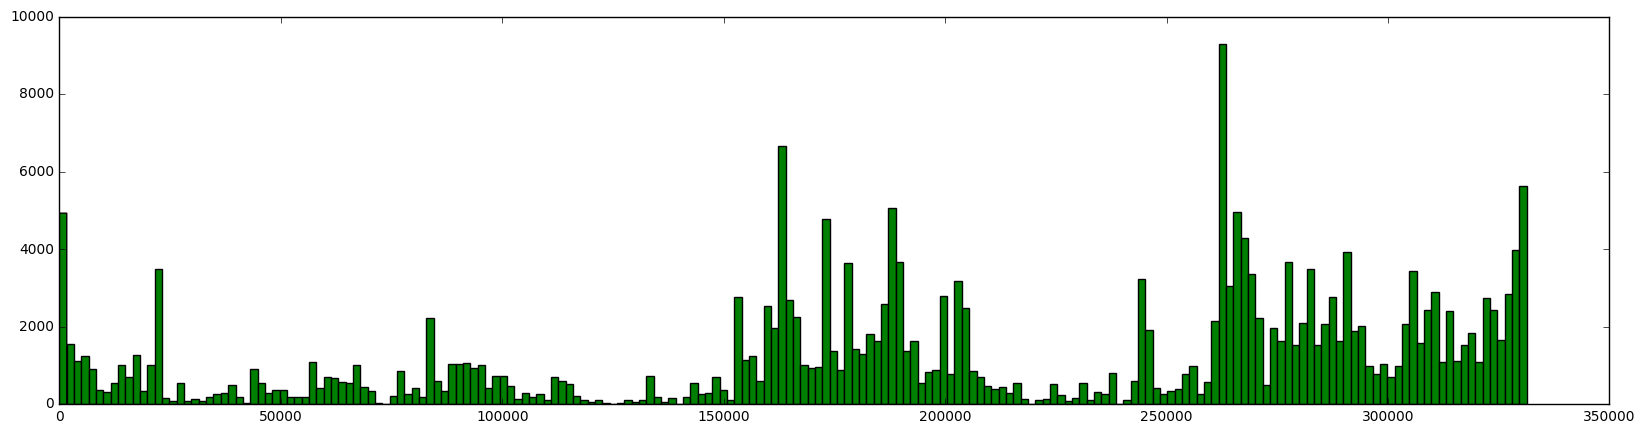

In [39]:
plt.figure(figsize=(20, 5))

n, bins, patches = plt.hist(
    quoted,
    range=(0, len(kjb.tokens)),
    bins=200,
    color='green',
)

plt.show()

Then, we can map the token offset indexes back onto characters in the raw text and pop out passages of interest. First, we get a set of indexes onto the histogram bins, sorted by the size of the bin. Then, we can step through the passages that fall inside the most-quoted bins.

In [91]:
import numpy as np

bin_idxs = np.argsort(n)[::-1]
bin_idxs[:10]

array([158,  98, 199, 113, 160,   0, 104, 161, 198, 175])

# #1

The largest, the 158th bin, is the Beatitudes, in Matthew:

In [86]:
def print_bin(idx):
    
    token1 = int(bins[idx])
    token2 = int(bins[idx+1]-1)
    
    char1 = kjb.tokens[token1].char1
    char2 = kjb.tokens[token2].char2

    print(kjb.text[char1:char2])

In [87]:
print_bin(158)

multitudes of people from Galilee,
and from Decapolis, and from Jerusalem, and from Judaea, and from
beyond Jordan.

5:1 And seeing the multitudes, he went up into a mountain: and when he
was set, his disciples came unto him: 5:2 And he opened his mouth, and
taught them, saying, 5:3 Blessed are the poor in spirit: for theirs is
the kingdom of heaven.

5:4 Blessed are they that mourn: for they shall be comforted.

5:5 Blessed are the meek: for they shall inherit the earth.

5:6 Blessed are they which do hunger and thirst after righteousness:
for they shall be filled.

5:7 Blessed are the merciful: for they shall obtain mercy.

5:8 Blessed are the pure in heart: for they shall see God.

5:9 Blessed are the peacemakers: for they shall be called the children
of God.

5:10 Blessed are they which are persecuted for righteousness' sake:
for theirs is the kingdom of heaven.

5:11 Blessed are ye, when men shall revile you, and persecute you, and
shall say all manner of evil against you falsely,

# #2

Psalms is second:

In [88]:
print_bin(98)

unto day uttereth speech, and night unto night sheweth
knowledge.

19:3 There is no speech nor language, where their voice is not heard.

19:4 Their line is gone out through all the earth, and their words to
the end of the world. In them hath he set a tabernacle for the sun,

19:5 Which is as a bridegroom coming out of his chamber, and rejoiceth
as a strong man to run a race.

19:6 His going forth is from the end of the heaven, and his circuit
unto the ends of it: and there is nothing hid from the heat thereof.

19:7 The law of the LORD is perfect, converting the soul: the
testimony of the LORD is sure, making wise the simple.

19:8 The statutes of the LORD are right, rejoicing the heart: the
commandment of the LORD is pure, enlightening the eyes.

19:9 The fear of the LORD is clean, enduring for ever: the judgments
of the LORD are true and righteous altogether.

19:10 More to be desired are they than gold, yea, than much fine gold:
sweeter also than honey and the honeycomb.

19:11 Mor

# #3

Third is the very end, the second half of Revelation:

In [90]:
print_bin(199)

Thou art righteous, O
Lord, which art, and wast, and shalt be, because thou hast judged
thus.

16:6 For they have shed the blood of saints and prophets, and thou
hast given them blood to drink; for they are worthy.

16:7 And I heard another out of the altar say, Even so, Lord God
Almighty, true and righteous are thy judgments.

16:8 And the fourth angel poured out his vial upon the sun; and power
was given unto him to scorch men with fire.

16:9 And men were scorched with great heat, and blasphemed the name of
God, which hath power over these plagues: and they repented not to
give him glory.

16:10 And the fifth angel poured out his vial upon the seat of the
beast; and his kingdom was full of darkness; and they gnawed their
tongues for pain, 16:11 And blasphemed the God of heaven because of
their pains and their sores, and repented not of their deeds.

16:12 And the sixth angel poured out his vial upon the great river
Euphrates; and the water thereof was dried up, that the way of the
k